Found 720 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


Epoch 1/10
45/45 [==============================] - 13s 237ms/step - loss: 0.8802 - accuracy: 0.6347 - val_loss: 0.5220 - val_accuracy: 0.8125
Epoch 2/10
45/45 [==============================] - 15s 323ms/step - loss: 0.5507 - accuracy: 0.7944 - val_loss: 0.4291 - val_accuracy: 0.8466
Epoch 3/10
45/45 [==============================] - 12s 257ms/step - loss: 0.4556 - accuracy: 0.8556 - val_loss: 0.4481 - val_accuracy: 0.8523
Epoch 4/10
45/45 [==============================] - 11s 230ms/step - loss: 0.3930 - accuracy: 0.8681 - val_loss: 0.4492 - val_accuracy: 0.8295
Epoch 5/10
45/45 [==============================] - 24s 530ms/step - loss: 0.3587 - accuracy: 0.8625 - val_loss: 0.4173 - val_accuracy: 0.8295
Epoch 6/10
45/45 [==============================] - 22s 475ms/step - loss: 0.3494 - accuracy: 0.8736 - val_loss: 0.3179 - val_accuracy: 0.9034
Epoch 7/10
45/45 [==============================] - 16s 342ms/step - loss: 0.3039 - accuracy: 0.8986 - val_loss: 0.2752 - val_accuracy: 0.8977

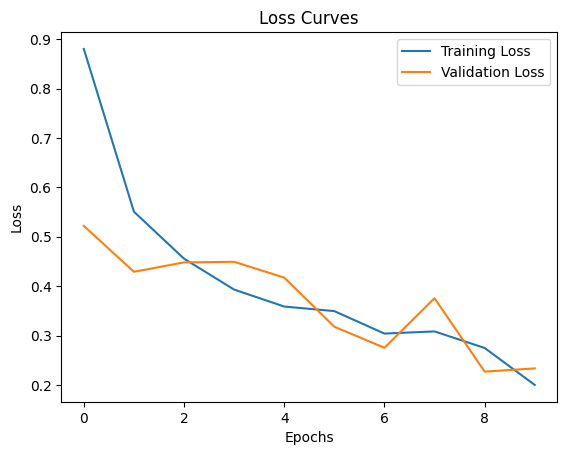

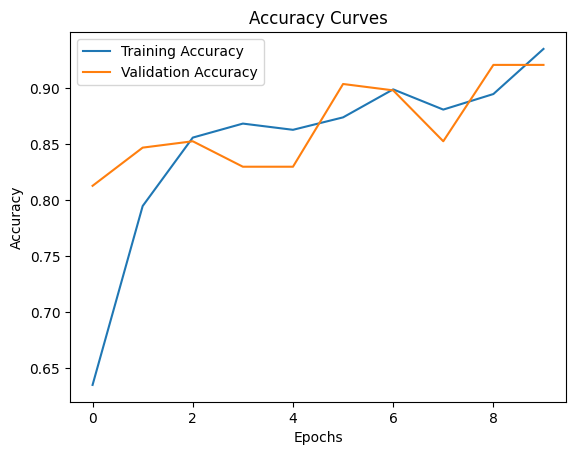

224/224 [==============================] - 4s 17ms/step - loss: 0.2586 - accuracy: 0.9330
Test accuracy: 0.9330357313156128


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = '../../datasets/dataset2/train'
test_dir = '../../datasets/dataset2/test'
val_dir = '../../datasets/dataset2/validation'
batch_size = 16
img_height, img_width = 64, 64
input_shape = (img_height, img_width, 3)

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # path to the training dataset
        target_size=(img_height, img_width), # resize images to this size
        batch_size=batch_size,
        class_mode='categorical') # output class labels as one-hot vectors

# Set up the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
        test_dir,  # path to the testing dataset
        target_size=(img_height, img_width),
        batch_size=1, # batch size of 1 to test one image at a time
        class_mode='categorical')

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

# Calculate the steps per epoch and validation steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model

history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Plot the loss curves for training and validation datasets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation datasets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print('Test accuracy:', test_acc)


224/224 [==============================] - 4s 13ms/step


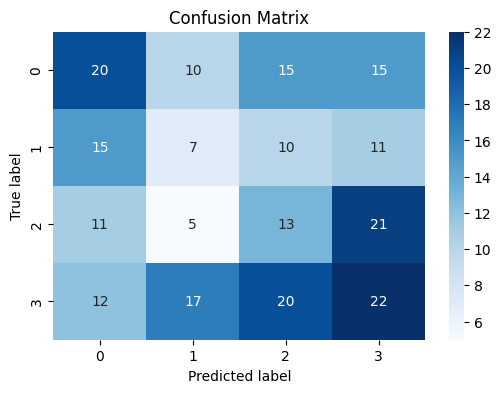

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Get the true labels for the validation set
true_labels = test_generator.classes

# Generate predictions for the validation set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)


# Visualize the confusion matrix, predicted labels distribution, and true labels distribution
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()